In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import rc
import seaborn as sns
rc('font',**{'family':'serif','serif':['Arial']})
plt.rcParams['pdf.fonttype'] = 42
rc('xtick', labelsize=7) 
rc('ytick', labelsize=7) 


In [2]:
# dataframe with percent change values at each timepoint
pc_df=pd.read_csv('2020-06-25_CPDseq/pc_df_TTgreaterthan5',index_col=0)
pc_df=pc_df[pc_df>0]
# RNA-Seq RPKMs
TS_rpkm=pd.read_csv('2018-05-22_RNAseq/TS_rpkm.csv',index_col=0)
NTS_rpkm=pd.read_csv('2018-05-22_RNAseq/NTS_rpkm.csv',index_col=0)
# combine all data into one dataframe
joined1=pc_df.join(TS_rpkm)
joined2=joined1.join(NTS_rpkm)

In [3]:
ratio_df=pd.DataFrame()
ratio_df['TS/NTS']=joined2['bm03_TS']/joined2['bm03_NTS']
ratio_df['TS/NTS_pc']=joined2['wt_20_TS']/joined2['wt_20_NTS']
ratio_df=ratio_df.dropna()

In [4]:
ratio_df=ratio_df.sort_values(by='TS/NTS_pc',ascending=False)

In [86]:
ratio_df


TS/NTS   TS/NTS_pc
gene                        
fdhE   66.720930  300.210468
dadX  232.400000  128.037389
aceF  442.800000  118.822620
rfbA  742.000000   83.864194
glrR   52.000000   54.526191
...          ...         ...
csgD   27.500000    0.031079
yodB    0.263158    0.009595
yfjW    9.066667    0.003383
elfA    8.300000    0.001554
gadE    2.416667    0.001421

[3290 rows x 2 columns]

In [15]:
low

TS/NTS  TS/NTS_pc
gene                      
gntT  49.018519   1.161269
rhtB   3.208333   1.161193
yfdQ   6.666667   1.159862
nikR   0.866667   1.159182
ydcA  65.000000   1.159029
...         ...        ...
csgD  27.500000   0.031079
yodB   0.263158   0.009595
yfjW   9.066667   0.003383
elfA   8.300000   0.001554
gadE   2.416667   0.001421

[1098 rows x 2 columns]

In [5]:
high=ratio_df.iloc[:1096,:]
mid=ratio_df.iloc[1096:2192,:]
low=ratio_df.iloc[2192:,:]

In [6]:
x1=np.log2(ratio_df['TS/NTS'].tolist())
x2=np.log2(high['TS/NTS'].tolist())


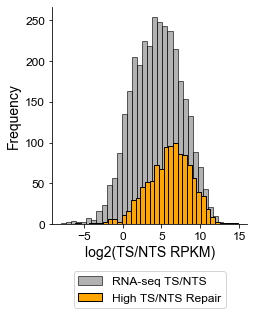

In [46]:
fig, ax= plt.subplots(figsize=(3.5,4))
ax.hist(x1,bins=35,edgecolor='k',color='grey',alpha=0.6, label='RNA-seq TS/NTS')
ax.hist(x2,bins=35,edgecolor='k',color='orange',label='High TS/NTS Repair')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

ax.legend(fancybox=True,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, -0.19))
#ax.legend(bbox_to_anchor=(0.7, 1))
ax.set_xlabel('log2(TS/NTS RPKM)',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
    
#ax.tick_params(axis='both', which='major', labelsize=9,rotation=0)

#plt.savefig("wt_hist_high_20min_2.png",bbox_inches='tight',transparent=True,dpi=600)


In [41]:
y1=np.log2(ratio_df['TS/NTS'].tolist())
y2=np.log2(mid['TS/NTS'].tolist())

In [48]:
fig, ax= plt.subplots(figsize=(3.5,4))
ax.hist(y1,bins=35,edgecolor='k',color='grey',alpha=0.6, label='RNA-seq TS/NTS')
ax.hist(y2,bins=35,edgecolor='k',color='yellow',label='Mid TS/NTS Repair')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.legend(fancybox=True,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, -0.19))
ax.set_xlabel('log2(TS/NTS RPKM)',fontname='Arial',fontsize=14)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)

#plt.savefig("wt_hist_mid_20min_2.png",bbox_inches='tight',transparent=True,dpi=600)


In [44]:
z1=np.log2(ratio_df['TS/NTS'].tolist())
z2=np.log2(low['TS/NTS'].tolist())


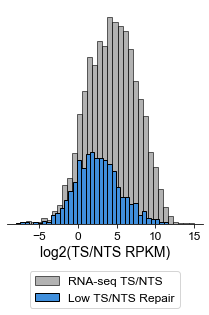

In [49]:
fig, ax= plt.subplots(figsize=(3.5,4))
ax.hist(z1,bins=35,edgecolor='k',color='grey',alpha=0.6,label='RNA-seq TS/NTS')
ax.hist(z2,bins=35,edgecolor='k',color='#408FDC',label='Low TS/NTS Repair')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

ax.legend(fancybox=True,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, -0.19))
ax.set_xlabel('log2(TS/NTS RPKM)',fontname='Arial',fontsize=14)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)

#plt.savefig("wt_hist_low_20min_2.png",bbox_inches='tight',transparent=True,dpi=600)
